# 군집화  
## K-평균 알고리즘 이해  
* K-평균 : 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘. 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법.  
<img src='https://image.slidesharecdn.com/20141214-170117004716/95/20141214-similarityclustering-20-638.jpg?cb=1484615075'>  

    군집 중심점은 선택된 포인트의 **평균 지점**으로 이동, 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 **평균 지점**으로 이동하는 프로세스를 반복적으로 수행.  
    
* K-평균 장점  
    1) 일반적인 군집화에서 가장 많이 활용됨.  
    2) 알고리즘이 쉽고 간결함.  
* K-평균 단점  
    1) 속성의 개수가 많을 경우 군집화 정확도가 떨어짐.(이럴 땐 PCA로 차원 감소)  
    2) 반복 횟수가 많을 경우 수행 시간이 매우 느려짐.  
    3) 몇 개의 군집(cluster)을 선택해야 할지 결정하기가 어려움.  
    
<br><br>

### 사이킷런 KMeans 클래스 소개  
* 중요 파라미터 소개  
    1) n_cluster : 군집화할 개수, 즉 군집 중심점의 개수를 의미함.  
    2) init : 초기에 군집 중심점의 좌표를 설정할 방식. 일반적으로 k-means++ 방식을 사용하여 최초 설정함.  
    3) max_iter : 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료함.  
    
* 주요 속성 정보  
    1) labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블.  
    2) cluster_centers_ : 각 중심점 좌표  
    
<br><br>

### K-평균을 이용한 붓꽃 데이터 세트 군집화

In [1]:
# 꽃받침, 꽃잎의 길이에 따라 각 데이터의 군집화가 어떻게 결정되는지 확인하고, 이를 분류 값과 비교해 보기.
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
# 붓꽃 데이터를 3개 그룹으로 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [3]:
# kmeans의 labels_ 속성 확인 : 각 데이터 포인트가 어떤 중심에 속하는지 확인.
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [9]:
# 실제 붓꽃 품종 분류 값과 얼마나 차이 나는지 확인.
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [10]:
# 붓꽃 데이터 세트 군집화 시각화
from sklearn.decomposition import PCA

# 붓꽃 데이터셋은 4차원이므로 2차원으로 PCA 변환
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_X'] = pca_transformed[:, 0]
irisDF['pca_Y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_X,pca_Y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


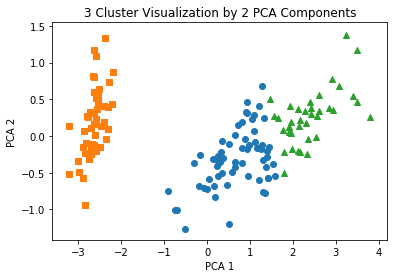

In [12]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_X'], y=irisDF.loc[marker0_ind, 'pca_Y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_X'], y=irisDF.loc[marker1_ind, 'pca_Y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_X'], y=irisDF.loc[marker2_ind, 'pca_Y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("3 Cluster Visualization by 2 PCA Components")
plt.show()

### 군집화 알고리즘 테스트를 위한 데이터 생성  
* 사이킷런은 다양한 유형의 군집화 알고리즘을 테스트해 보기 위한 간단한 데이터 생성기를 제공함.  
* 대표적인 군집화용 데이터 생성기 : make_blobs(), make_classification()  

    1) make_blobs() : 개별 군집의 중심점과 표준 편차 제어 기능 추가.  
    2) make_classification() : 노이즈를 포함한 데이터를 만드는 데 유용.  
    
* make_blobs()  
    
    1) make_blobs()를 호출하면 피처 데이터 세트와 타깃 데이터 세트가 **튜플(Tuple)** 형태로 반환.  
    2) 호출 파라미터  
    
        1. n_samples : 생성할 총 데이터 개수, 디폴트는 100.  
        2. n_features : 데이터의 피처 개수. 시각화를 목표로 할 경우 보통 2개로 설정함.  
        3. centers : int값이면 군집의 개수, ndarray형태면 개별 군집 중심점의 좌표.  
        4. cluster_std : 생성될 군집 데이터의 표준 편차. float값 0.8과 같은 형태로 지정하면 군집 네에서 데이터가 표준편차 0.8을 가진 값으로 만들어짐. [0.8, 1.2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫번째는 0.8, 두번째는 1.2, 세번째는 0.6의 표준편차를 가진 값으로 만들어짐.  

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target값의 분포를 확인
# numpy.unique(arr, return_index, return_inverse, return_counts) : 입력된 배열에서 중복되지 않는 고유한 요소들의 배열을 리턴
# return_counts : 값이 True면 중복 되지 않는 요소들이 입력 배열에 나타난 횟수를 리턴
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [17]:
# 위의 데이터셋을 DataFrame으로 변환
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


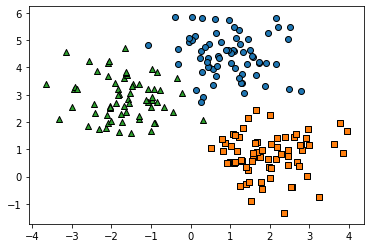

In [21]:
# clusterDF의 군집화 분포 시각화
target_list = np.unique(y)
# 각 타깃별 산점도의 마커값
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

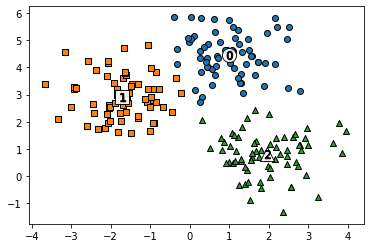

In [27]:
# make_blobs()로 만들어진 데이터셋인 clusterDF를 KMeans 군집화 수행 후 시각화
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', marker='$%d$' % label)
    
plt.show()

In [28]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


## 군집 평가(Cluster Evaluation)  
* 대부분의 군집화 데이터는 이전에 했던 붓꽃 데이터와 달리 타깃 레이블값을 가지고 있지 않아 군집화가 잘 됐는지 평가하기 어려움.  
* 군집화는 비지도학습이기 때문에 정확하게 성능을 평가하기 어렵지만 군집화의 성능을 평가해야 할 경우 대표적인 방법으로 실루엣 분석을 이용.  
<br>

### 실루엣 분석의 개요  
* 실루엣 분석(silhouette analysis)  
    
    1) 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄.  
        **효율적으로 잘 분리됐다**    
            - 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가까움.  
            - 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있음.  
            
    2) 실루엣 분석은 실루엣 계수(silhouette coefficient)를 기반으로 함.  
    
        **실루엣 계수**  
            - 개별 데이터가 가지는 군집화 지표.  
            - 군집화가 잘 되었는지를 나타내는 지표.  
            
<img src='https://i.imgur.com/VfvGewn.png'>  

            - i번째 데이터 포인트의 실루엣 계수 s(i) = (b(i) - a(i)) / (max(a(i), b(i))  
            
                a(i) : i번째 데이터에서 자신이 속한 클러스터내의 다른 데이터 포인트들과의 거리의 평균.  
                b(i) : i번째 데이터에서 가장 가까운 타 클러스내의 다른 데이터 포인트들과의 거리의 평균.  
                
            - 실루엣 계수는 -1에서 1 사이의 값을 가짐.  
            - 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고 0에 가까울수록 근처이 군집과 가까워진다는 것.  
            - (-)값은 아예 다른 군집에 데이터 포인트가 할당됐음을 뜻함.  
            
* 사이킷런에서 제공하는 실루엣 분석 메서드  
        1) sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds) : 각 데이터 포인트의 실루엣 계수를 계산해 반환.  
        2) sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds) : 전체 데이터의 실루엣 계수값을 평균해 반환. np.mean(silhouette_samples()). 이 값이 높을수록 군집화가 어느 정도 잘 됐다고 판단할 수 있음.  
    <br>
* **좋은 군집화란?**  

        1. silhouette_score()값이 0~1사이의 값을 가지며, 1에 가까울수록 좋은 군집화.  
        2. silhouette_score()값이 각각의 silhouette_samples() 값들에 크게 벗어나면 안됨.  
        
<br><br>

### 붓꽃 데이터 세트를 이용한 군집 평가  


In [29]:
# 붓꽃 데이터셋의 군집화 결과를 실루엣 분석으로 평가하기
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 축
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print("붓꽃 데이터 세트 Silhouette Analysis Score : {0:.3f}".format(average_score))
irisDF.head(3)

silhouette_samples() return값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score : 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [30]:
# 군집별 평균 실루엣 계수값 알아 보기
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법  
군집 개수에 따라 평균 실루엣 계수가 영향을 받음.  
따라서 데이터셋에 따른 최적의 군집 개수를 찾는 것이 중요함.  

In [36]:
# 군집 개수에 따른 평균 실루엣 계수값 시각화
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성.
def visualize_silhouette(cluster_lists, X_features):
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함.
    n_cols = len(cluster_lists)
    
    # plt.subplots()로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성.
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 갯수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고 실루엣 스코어와 개별 데이터의 실루엣값 계산.
        clusterer = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

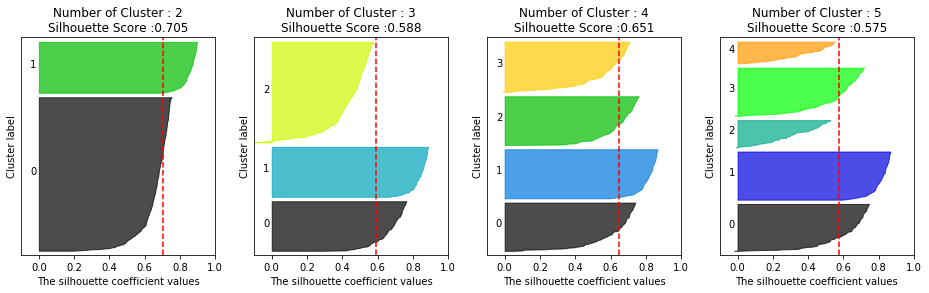

In [38]:
# make_blobs()를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2, 3, 4, 5], X)

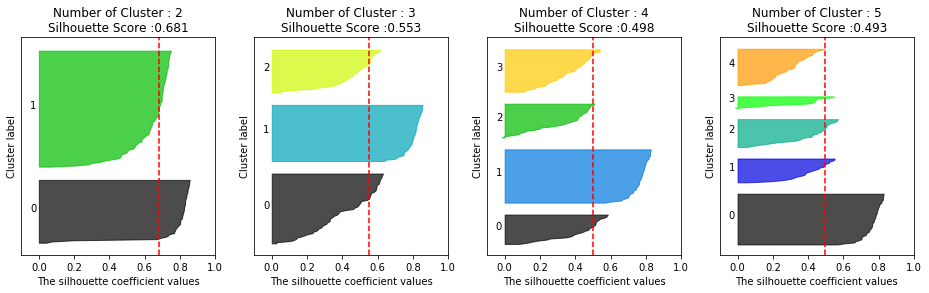

In [39]:
# 붓꽃 데이터의 K-평균 수행시 최적의 군집 개수 알아보기
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2, 3, 4, 5], iris.data)

## 평균 이동  
### 평균 이동(Mean Shift)의 개요  
* 평균 이동(Mean Shift)  
    1. 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행.  
    2. 중심을 어떻게 찾을까? -> **데이터의 분포도**를 이용해 군집 중심점을 찾음.  
    3. 데이터 분포도는 **확률 밀도 함수(PDF, Probability Density Function)**을 이용함.  
* 확률 밀도 함수  
    1. 확률 변수의 분포를 나타내는 함수.  
    2. 정규분포 함수, 감마 분포, t-분포 등이 있음.  
    3. 확률 밀도 함수를 통해 변수의 특성, 확률 분포 등 변수의 많은 요소를 알 수 있음.  
    
* 모델의 확률 밀도 함수를 어떻게 구할 수 있을까? -> **KDE(Kernel Density Estimation)을 이용한다.**  
* KDE  
    1. 커널(Kernel) 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방식.  
    2. 대표적인 커널 함수로는 가우시안 분포 함수가 사용됨.  
    3. 개별 관측 데이터에 커널 함수 적용 -> 이 적용 값을 모두 더함 -> 개별 관측 데이터의 건수로 나눠 확률 밀도 함수 추정.  
    4. KDE 식은 다음과 같음.(K : 커널 함수, x : 확률 변수값, xi : 관측값, h : 대역폭(bandwidth))    
<img src='https://t1.daumcdn.net/cfile/tistory/261A943654F0325532'>  

* KDE의 대역폭 h  
    1. 대역폭 h는 KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(Smoothing)하는데 적용됨.  
    2. 시계방향으로 h=(1.0, 2.5, 5.0, 10.0)인 경우  
<img src='https://i2.wp.com/content.edupristine.com/images/blogs/Density_image7.jpg?w=525&ssl=1'>  
    
    3. h가 작을수록 좁고 뾰족한 KDE를 가지며 과적합되기 쉽고. h가 클수록 과도하게 평활화되어 과소적합되기 쉬움.  
    4. **따라서 적절한 KDE의 대역폭 h를 계산하는 것이 KDE 기반의 평균 이동 군집화에서 매우 중요함.**  
    <br>
    
* 사이킷런에서의 Mean Shift  
    1. 사이킷런에서는 평균 이동 군집화를 위해 MeanShift 클래스를 제공함.  
    2. 가장 중요한 파라미터는 bandwidth이고 대역폭 h를 의미함.  
    3. 사이킷런은 최적의 대역폭 계산을 위해 estimate_bandwidth() 함수를 제공.

In [40]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

# MeanShift 대역폭 0.8로 설정
meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print("cluster labels 유형 : ", np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2 3 4 5]


In [43]:
# MeanShift의 대역폭 1로 설정
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print("cluster labels 유형 : ", np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2]


In [45]:
# estimate_bandwidth() : 최적화된 bandwidth값 반환
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print("bandwidth값 : ", round(bandwidth, 3))

bandwidth값 :  1.816


In [46]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print("cluster labels 유형 : ", np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2]


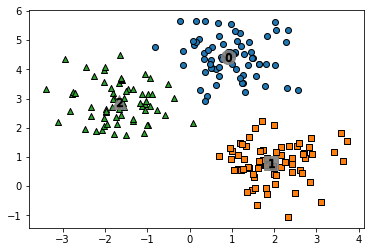

In [47]:
# 구성된 3개의 군집 시각화하기
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [48]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


## GMM(Gausian Mixture Model)  
### GMM 소개  
1. GMM은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주함.  
2. 섞인 데이터 분포에서 **개별 유형의 가우시안 분포**를 추출.  
<img src='https://miro.medium.com/max/1506/1*lTv7e4Cdlp738X_WFZyZHA.png'>  
**서로 다른 정규 분포에 기반해 각 데이터가 어느 정규분포에 속할지를 결정하는 방식.**  
<br>
3. 이와 같은 방식을 GMM에서는 **모수 추정**이라 함.  
        1) 개별 정규 분포의 평균과 분산.  
        2) 각 데이터가 어떤 정규 분포에 해당하는지의 확률.  
    
4. GMM에서는 모수 추정을 하기 위해 EM(Expectation and Maximization) 방식을 적용함.  
5. 사이킷런에서는 GMM을 지원하는 GaussianMixture 클래스가 존재함.  
    * GaunssianMixture 객체의 가장 중요한 초기화 파라미터 : n_components.  
        n_components는 모델의 총 개수를 의미함.

<br>

### GMM을 이용한 붓꽃 데이터 세트 군집화

In [49]:
# 붓꽃 데이터로 GMM과 KMeans 두 방식 비교
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [50]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target값에 따라 gmm_cluster값이 어떻게 매핑됐는지 확인.
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


In [53]:
# 붓꽃 데이터셋에 k-평균 군집화를 수행한 결과
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


### GMM과 K-평균의 비교  
1. KMeans는 **원형의 범위**에서 군집화를 수행하기 때문에 **데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율은 높아짐.**  
2. 하지만 데이터가 길쭉할수록 KMeans는 군집화를 잘 수행하지 못함.  

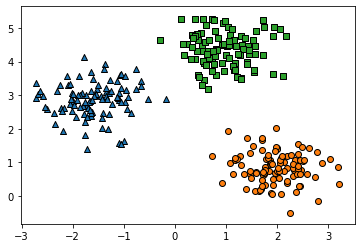

In [54]:
# cluster_std=0.5로 설정함으로써 데이터 세트가 원형의 범위를 가지도록 함. -> KMeans의 성능이 굉장히 좋음.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(X)
kmeans_cluster_labels = kmeans.predict(X)

clusterDF['kmeans_label'] = kmeans_cluster_labels
unique_labels = np.unique(cluster_labels)
markers = ['^', 'o', 's']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
plt.show()

In [55]:
# 군집화 결과를 시각화하기 위한 visualize_cluster_plot() 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

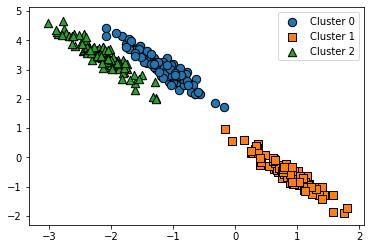

In [56]:
# 데이터가 길쭉한 타원형일 때 KMeans를 수행하면?
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함.
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

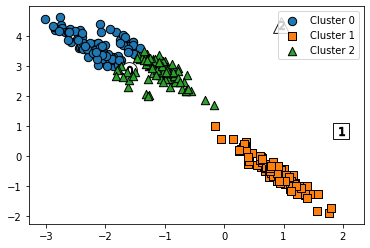

In [58]:
# 3개의 군집 기반 KMeans를 X_aniso 데이터 세트에 적용
Kmeans = KMeans(3, random_state=0)
kmeans_label = Kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

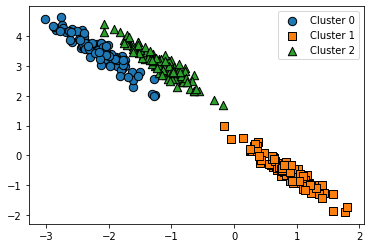

In [60]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscluster를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

In [61]:
# 위 데이터셋에서 GMM과 KMeans의 군집화 효율 차이 확인하기
print("### Kmeans Clustering ###")
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print("\n### Gaussian Mixture Clustering ###")
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### Kmeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


1. GMM의 경우 KMeans 보다 유연하게 다양한 데이터셋에 잘 적용됨.  
2. 하지만 GMM은 시간이 오래 걸린다는 단점이 있음.

## DBSCAN  
### DBSCAN(Density Based Spatial Clustering of Applications with Noise)의 개요  
1. **밀도 기반 군집화**의 대표적인 알고리즘.  
2. 간단하고 직관적인 알고리즘.  
3. 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적임.  
4. DBSCAN의 중요한 파라미터  
        1) 입실론 주변 영역(epsilon) : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역.  
        2) 최소 데이터 개수(min points) : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수.  
5. **DBSCAN은 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화하는 방식**  
<img src='https://csleoss.etri.re.kr/images/contents/manual_1.0/images/4.1.1.1.DBSCAN.png'>  
    
    1) (a)는 min points를 자기 자신을 포함해 6으로 설정함. 데이터 포인트 X는 입실론 반경에서 자기 자신을 포함해 6개의 데이터 포인터를 가짐. 데이터 포인트들 중에서 입실론 반경 안에서 min points를 만족하는 데이터 포인트를 **핵심 포인트(Core Point)**라고 함.  
    2) (b)에서 데이터 포인트 y는 입실론 반경 안에서 min points를 만족시키진 못하지만 핵심 포인트인 x를 가짐. 이러한 데이터 포인트를 **경계 포인트(Border Poing)**라고 함.   
    3) (b)에서 데이터 포인트 z는 입실론 반경 안에서 min points를 만족시키지 못하고 핵심 포인트를 가지고 있지 않음. 이를 **잡음 포인트(Noise Point)**라고 함.  
    4) **이웃 포인트(Neighbor Point)** : 주변 영역 내에 위치한 타 데이터를 말함.      
    <br>

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTBT-VsF5jQ8FzCUSEruDiuACoZrcKrD9wCmI3Vh2PDACEXENC3&usqp=CAU'>  

위 사진을 보면 핵심 포인트 r의 이웃 데이터는 p임. 그리고 p는 핵심 데이터임. 핵심 데이터끼리 이웃 데이터인 경우 직접 접근이 가능해지고 서로 연결해 군집화를 구성함. 이런 방식으로 군집화 영역을 확장하는 것이 DBSCAN 군집화 방식임.  

<br>

6. 사이킷런에서 DBSCAN 클래스는 DBSCAN 알고리즘을 지원함.   
* 주요 파라미터  
        1) eps : 입실론 주변 영역의 반경.  
        2) min_samples : 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수(자신의 데이터 포함).  
        
        <br>
        
### DBSCAN 적용하기 - 붓꽃 데이터 세트

In [62]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

# 일반적으로 eps는 1 이하의 값을 설정.
dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


DBSCAN에서 군집 레이블이 -1인 것은 노이즈에 속하는 군집임.

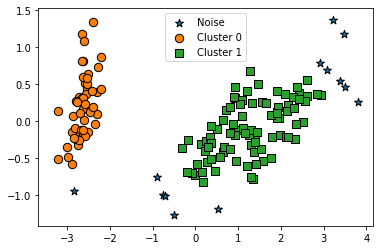

In [63]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

# visualize_cluster_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

1. DBSCAN 알고리즘은 적절한 eps와 min_samples 파라미터를 통해 최적의 군집을 찾는 것이 중요함.  
2. eps가 커질수록 노이즈 데이터 개수가 작아짐.  
3. min_samples가 커질수록 노이즈 데이터 개수가 많아짐.

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


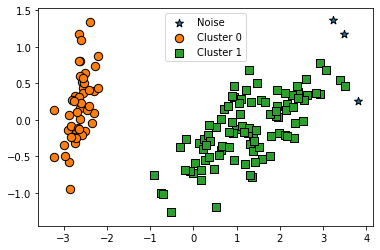

In [66]:
# eps를 0.6 -> 0.8로 증가
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


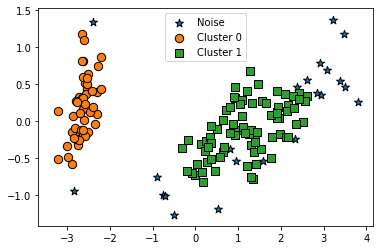

In [68]:
# min_samples를 8 -> 16으로 변경
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### DBSCAN 적용하기 - make_circles() 데이터 세트  
make_circles() : 내부 원과 외부 원 형태로 돼 있는 2차원 데이터 세트 생성 함수. 2개의 피처만을 생성.

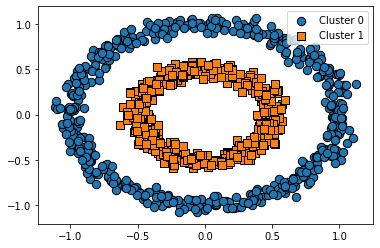

In [71]:
from sklearn.datasets import make_circles

# noise : 노이즈 데이터 세트의 비율, factor : 외부 원과 내부 원의 scale 비율
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

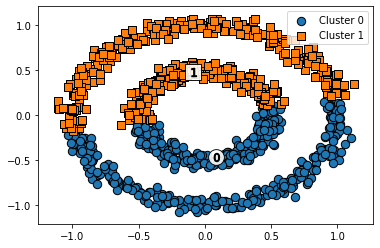

In [74]:
# KMeans로 make_circles() 데이터 세트를 군집화 수행.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

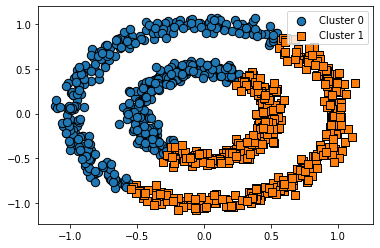

In [76]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행.
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

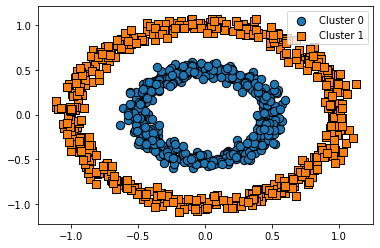

In [77]:
# DBSCAN으로 make_circles() 데이터 세트 군집화 수행
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

## 군집화 실습 - 고객 세그먼테이션  
### 고객 세그먼테이션의 정의와 기법  
1. 고객 세그먼테이션(Customer Segmentation) : 다양한 기준으로 고객을 분류하는 기법. CRM, 마케팅의 중요 기반 요소.  
2. 고객 분류의 중요한 분류 요소 : **어떤 상품을 얼마나 많은 비용을 써서 얼마나 자주 사용하는가**  
3. 고객 세그먼테이션의 주요 목표 : **타깃 마케팅**(고객을 여러 특성에 맞게 세분화해 맞춤형 마케팅과 서비스를 제공하는 것)  
4. 고객 세그먼테이션의 기본적인 고객 분석 요소는 **RFM 기법**임.  
    * RFM 기법  
        1) RECENCY(R) : 가장 최근 상품 구입 일에서 오늘까지의 기간.  
        2) FREQUENCY(F) : 상품 구매 횟수.  
        3) MONETARY VALUE(M) : 총 구매 금액  
        
<br>

## 데이터 세트 로딩과 데이터 클렌징  
예제 데이터 : http://archive.ics.uci.edu/ml/datasets/online+retail

In [78]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io='Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [79]:
# 데이터 세트의 전체건수, 칼럼 타입, Null 개수 확인
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [80]:
# 데이터 사전 정제 작업(Null 데이터 제거, 오류 데이터 삭제)
# Quantity > 0, UnitPrice > 0, CustomerID가 Not Null인 값만 필터링
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [82]:
retail_df['Country'].value_counts()[:5]

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

In [83]:
# 주요 주문 고객은 영국이므로, 다른 국가의 데이터는 모두 제외.
retail_df = retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


### RFM 기반 데이터 가공  

In [86]:
# UnitPrice와 Quantity를 곱해 주문 금액 데이터 생성
retail_df['sale_amount'] = retail_df['UnitPrice']*retail_df['Quantity']
# CustomerID의 편리한 식별성을 위해 float형 -> int형 변환
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [90]:
# Top5 주문 건수 고객 데이터 추출
print(retail_df['CustomerID'].value_counts().head(5))
# Top5 주문 금액 고객 데이터 추출
print(retail_df.groupby(['CustomerID'])['sale_amount'].sum().sort_values(ascending=False)[:5])

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [92]:
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

In [94]:
# DataFrame의 groupby()의 multiple 연산을 위해 agg() 이용
# Recency(가장 최근 구매일부터 오늘까지의 기간)는 InvoiceDate 칼럼의 max()에서 데이터 가공
# Frequency(총 구매 횟수)는 InvoiceNo 칼럼의 count(), Monetary value(총 구매 금액)는 sale_amount 칼럼의 sum()
aggregations = {
    'InvoiceDate' : 'max', 
    'InvoiceNo' : 'count', 
    'sale_amount' : 'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)

# groupby된 결과 칼럼 값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns={'InvoiceDate' : 'Recency', 
                                 'InvoiceNo' : 'Frequency', 
                                 'sale_amount' : 'Monetary'
                                }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [95]:
# 2011년 12월 10일을 현재 날짜로 간주하고 가장 최근의 주문 일자를 뺀 데이터에서 일자 데이터(days)만 추출해 생성
import datetime as dt
cust_df['Recency'] = dt.datetime(2011, 12, 10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x : x.days+1)
print("cust_df 로우와 칼럼 건수는 ", cust_df.shape)
cust_df.head(3)

cust_df 로우와 칼럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


### RFM 기반 고객 세그먼테이션  

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <a list of 10 Patch objects>)

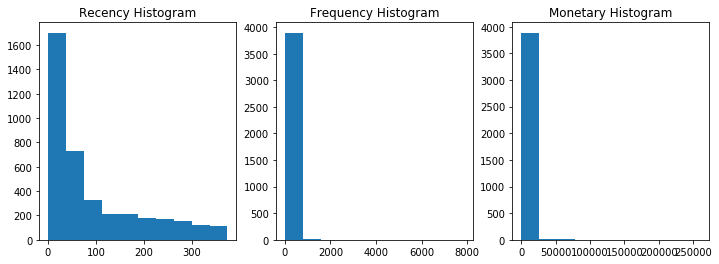

In [96]:
# 칼럼값 분포 히스토그램 확인
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)
ax1.set_title("Recency Histogram")
ax1.hist(cust_df['Recency'])

ax2.set_title("Frequency Histogram")
ax2.hist(cust_df['Frequency'])

ax3.set_title("Monetary Histogram")
ax3.hist(cust_df['Monetary'])

In [97]:
# 각 칼럼의 데이터값 백분위로 값분포 확인
cust_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [99]:
# 데이터 세트를 StandardScaler로 평균과 표준편차 재조정
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency', 'Frequency', 'Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print("실루엣 스코어는 : {0:.3f}".format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는 : 0.592


In [100]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

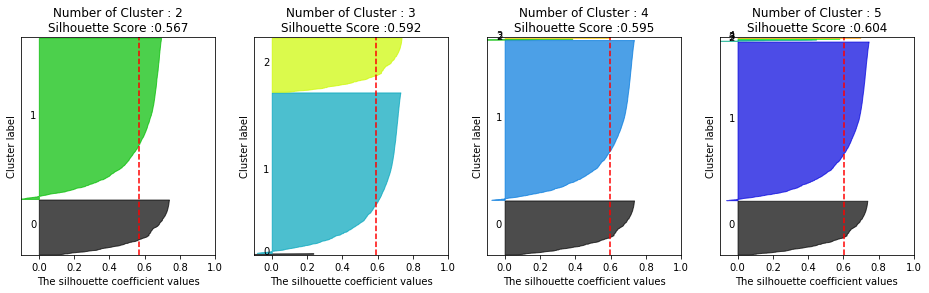

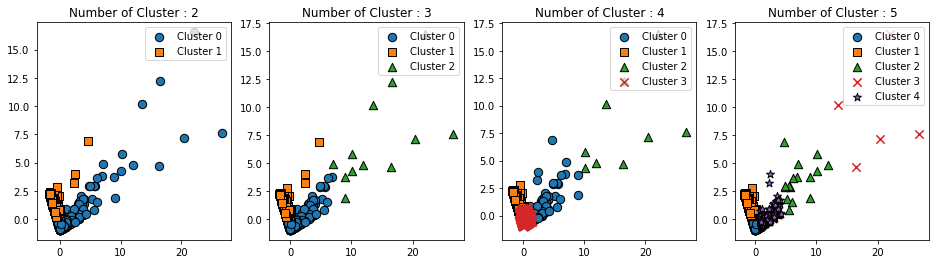

In [101]:
visualize_silhouette([2, 3, 4, 5], X_features_scaled)
visualize_kmeans_plot_multi([2, 3, 4, 5], X_features_scaled)

In [102]:
# 데이터셋의 왜곡 정도를 낮추기 위해 데이터값에 로그(Log)를 적용하는 로그 변환 후 KMeans 군집화 수행
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequency, Monetary 칼럼에 np.log1p()로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print("실루엣 스코어는 : {0:.3f}".format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는 : 0.305


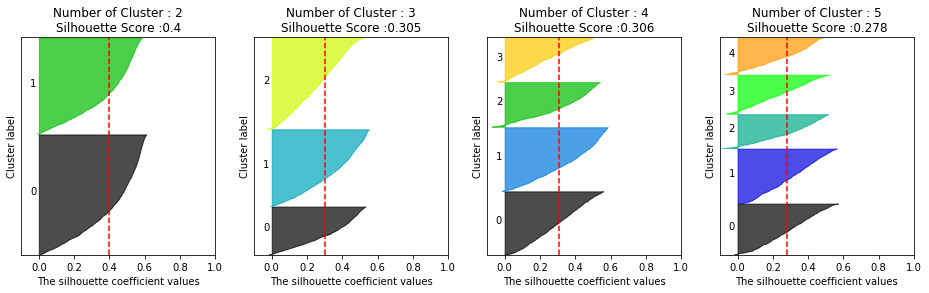

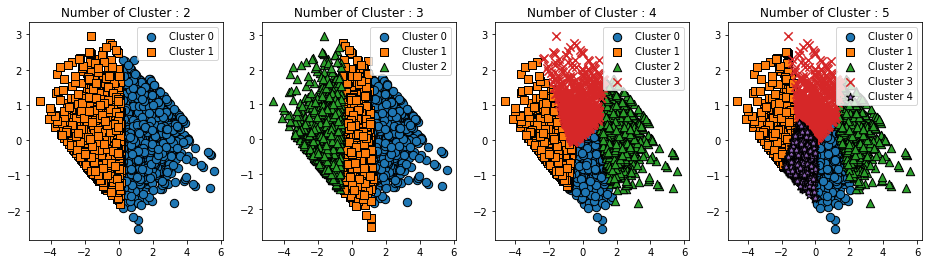

In [103]:
visualize_silhouette([2, 3, 4, 5], X_features_scaled)
visualize_kmeans_plot_multi([2, 3, 4, 5], X_features_scaled)